## Введение в регрессионный анализ<br>Домашнее задание №1

Задание выполнил(а): **Овчаров Иван, БПТ-222**

### Формат сдачи

В текущий ipynb-файл необходимо вписать решения (код и текст с интерпретацией), сохранить изменения, а затем загрузить файл в папку на Dropbox по ссылке на странице курса. Аккаунт Dropbox для этого не требуется.

Текст с интерпретацией должен быть в отдельных ячейках типа *Markdown*, не в виде комментариев к коду, ячейки с текстом должны быть аккуратно оформлены.

Всего за задание можно получить 15 баллов.

### Задание

Загрузите в Python данные из CSV-файла, соответствующего вашему варианту, и сохраните их в датафрейм `insure`. В этом датафрейме хранятся данные по получателям медицинской страховки в США:

* `age`: возраст;
* `sex`: пол;
* `bmi`: индекс массы тела;
* `children`: число детей, на которых распространяется страховка;
* `smoker`: курит ли получатель страховки или нет;
* `region`: регион проживания в США;
* `charges`: расходы на медицинские услуги, которые покрывает страховка (в долларах).

In [2]:
import pandas as pd

insure = pd.read_csv('данные.csv')

### Задание 1 (4 балла)

Используя возможности `pandas` и `matplotlib` (при желании – другие библиотеки для визуализации), постройте гистограммы для двух переменных: **индекс массы тела** и **расходы на медицинские услуги, покрываемые страховкой**. Всего должно получиться две разные гистограммы. Проинтерпретируйте полученные графики. В качестве результата выполнения этого задания:

* приведите строки кода, необходимые для построения графиков, и сами графики;
* приведите подробную интерпретацию: комментарии о симметричности/скошенности распределения, указание на то, какие значения встречаются чаще, а какие – реже.

<AxesSubplot:>

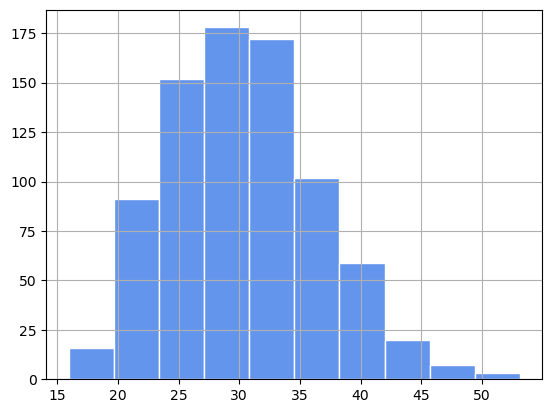

In [3]:
insure['bmi'].hist(color = "cornflowerblue", edgecolor = "white")

In [8]:
print(insure['bmi'].mean())
print(insure['bmi'].median())
print(insure['bmi'].skew())
print(insure['bmi'].mode())

30.375931249999994
30.02
0.37889400000540596
0    31.350
1    32.775
Name: bmi, dtype: float64


**Комментарий по bmi**: значения индекса распределены неравномерно (положительная ассиметрия, т.е. правое смещение кривой). Коэффициент ассиметрии ~0.378. Чаще всего встречаются значения примерно от 23 до 35.

<AxesSubplot:>

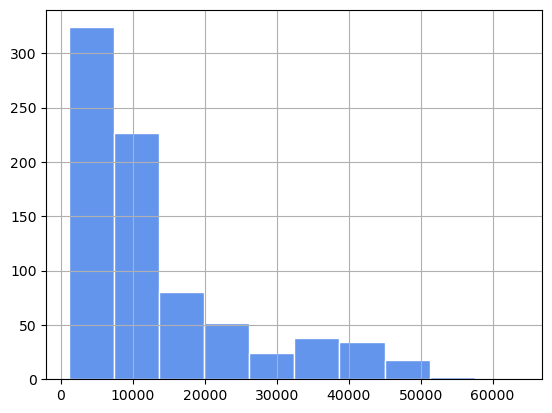

In [9]:
insure['charges'].hist(color = "cornflowerblue", edgecolor = "white")

In [14]:
print(insure['charges'].mean())
print(insure['charges'].median())
print(insure['charges'].skew())
print(insure['charges'].mode())

13335.296902136248
9401.1755
1.4355347726733063
0       1121.87390
1       1131.50660
2       1135.94070
3       1137.01100
4       1137.46970
          ...     
795    48675.51770
796    48885.13561
797    52590.82939
798    55135.40209
799    63770.42801
Name: charges, Length: 800, dtype: float64


**Комментарий по charges**: значения индекса распределены крайне неравномерно (положительная ассиметрия, т.е. правое смещение кривой). Коэффициент ассиметрии ~1.435. Чаще всего встречаются значения примерно от 0 до 15000.

### Задание 2 (2 балла)

Вычислите коэффициент корреляции Пирсона между показателями **индекс массы тела** и **расходы на медицинские услуги, покрываемые страховкой** и проверьте его статистическую значимость (уровень значимости 5%). Проинтерпретируйте полученные результаты. В качестве результата выполнения этого задания:

* приведите строки кода, необходимые для вычисления коэффициента и проверки его значимости, выдачу с результатами;
* приведите подробную интерпретацию: указание тестируемой нулевой гипотезы, вывод о ее отвержении/не-отвержении с обоснованием на основе выдачи, выводы о наличии/отсутствии связи и комментарий о ее силе.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

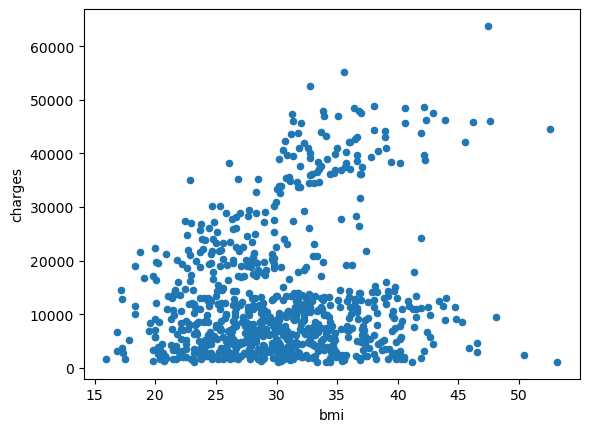

In [15]:
insure.plot.scatter(x = 'bmi', y = 'charges')

In [19]:
from scipy import stats as st
st.pearsonr(insure['bmi'], insure['charges'])

PearsonRResult(statistic=0.20687199831063335, pvalue=3.5034861569778436e-09)

#### Интерпретация полученных результатов:

Из результатов выдачи мы получили коэф. Пирсона ~ 0.2. Сформулируем две гипотезы:

$$
H_0:R=0 \text{ (линейной связи нет) }
$$
$$ 
H_1:R\ne0 \text{ (линейная связь есть) }
$$

При условии, что мы проверяем значимость коэффициента на уровне a = 0.05, для отвержения нулевой гипотезы p-value < 0.05. В данном случае, мы имеем p-value = 3.5034861569778436e-09 < 0.05. Таким образом, гипотеза об отстутсвии связи отвергается. 

В данном случае, коффициент равен ~0.2, что свидетельствует о слабой (R < 0.3), положительной связи (R > 0). 

### Задание 3 (2 балла)

Предположим, что нас интересует, каким образом связаны индекс массы тела и расходы на медицинские услуги, которые покрывает страховка. Чтобы это выяснить, необходимо построить модель парной линейной регрессии.

Используя возможности библиотеки `statsmodels`, постройте модель парной линейной регрессии, которая покажет характер связи между индексом массы тела и расходами на медицинские услуги. В качестве результата выполнения этого задания:

* приведите строки кода, необходимые для построения модели, и выдачу, полученную после оценки модели;
* приведите краткое описание модели: какая переменная является зависимой, какая – независимой.

In [22]:
from statsmodels.formula.api import ols

md1 = ols('charges ~ bmi', insure).fit()
md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     35.68
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           3.50e-09
Time:                        15:02:47   Log-Likelihood:                -8635.2
No. Observations:                 800   AIC:                         1.727e+04
Df Residuals:                     798   BIC:                         1.728e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1120.4355   2087.131      0.537      0.592   -2976.480    5217.351
bmi          402.1230     67.322      5.973      0.000     269.974     534.272
==============================================================================
Omnibus:                      132.009   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.891
Skew:                           1.179   Prob(JB):                     1.07e-43
Kurtosis:                       3.611   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Примечание: 'charges' – зависимая переменная, 'bmi' – независимая переменная**

### Задание 4 (2 балла)

Проинтерпретируйте полученные результаты: приведите интерпретацию оценки коэффициента при независимой переменной, проверьте, можно ли считать оценку коэффициента статистически значимой на уровне значимости 5%.

**Оценка коэффициента при независимой переменной = 402.123, t-статистика = 5.973, т.е. не попадает в интервал [-2;2], поэтому можно считать оценку статистически значимой на уровне a = 0.05.**

### Задание 5 (3 балла)

Запишите уравнение модели (полноценное, со всеми необходимыми индексами и «крышечками»). Вычислите, чему равно, согласно полученной модели, среднее ожидаемое значение зависимой переменной, если значение независимой равно медианному по выборке.

**Подсказка:** медианное значение по выборке можно получить из выдачи метода `.describe()`, если применить его к нужному столбцу.

$$
\widehat{\text{charges}}_i={1120.4335} +{402.1230} \times \text{bmi}_i.
$$

In [25]:
print(1120.4335 + 402.1230 * (insure['bmi'].median()))

13192.165959999998


### Задание 6 (1 балл)

Запишите, чему равен коэффициент детерминации $R^2$. Можно ли считать, что модель объясняет высокую долю изменчивости зависимой переменной?

In [1]:
print(md1.rsquared)

NameError: name 'md1' is not defined

**Нельзя считать, что модель объясняет высокую долю изменчивости зависимой переменной, потому что $R^2$, который фактически является долей ESS от TSS, слишком мал.**

### Задание 7 (1 балл)

Извлеките из модели значения ESS, RSS и TSS и приведите альтернативный способ вычисления $R^2$ – проверьте, что Python не ошибся :)

In [27]:
print(md1.ess)
print(md1.ssr)
print(md1.centered_tss)

4972105633.182999
111209380520.2066
116181486153.3896


In [26]:
md1.ess / md1.centered_tss

0.042796023685034754

**Питон не ошибся!**

(до 15 знака после запятой)